In [73]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

load_dotenv()

True

In [74]:
API_KEY = os.getenv('API_KEY', -1)
if API_KEY == -1:
    raise('INVALID API KEY')
response = requests.get('https://api.football-data.org/v2/competitions/BSA/standings', headers={
    'X-Auth-Token': API_KEY,
})

In [75]:
response = response.json()

In [76]:
table = response['standings'][0]['table']

In [77]:
for placement in table:
    print("The {0} team is {1} with {2} wins".format(placement['position'], placement['team']['name'], placement['won']))

The 1 team is CA Mineiro with 18 wins
The 2 team is SE Palmeiras with 15 wins
The 3 team is Fortaleza EC with 14 wins
The 4 team is CR Flamengo with 14 wins
The 5 team is RB Bragantino with 11 wins
The 6 team is SC Internacional with 10 wins
The 7 team is SC Corinthians Paulista with 10 wins
The 8 team is Fluminense FC with 10 wins
The 9 team is AC Goianiense with 9 wins
The 10 team is América FC with 8 wins
The 11 team is Cuiabá EC with 7 wins
The 12 team is CA Paranaense with 10 wins
The 13 team is São Paulo FC with 7 wins
The 14 team is Ceará SC with 6 wins
The 15 team is EC Bahia with 8 wins
The 16 team is EC Juventude with 6 wins
The 17 team is Santos FC with 6 wins
The 18 team is SC Recife with 6 wins
The 19 team is Grêmio FBPA with 7 wins
The 20 team is Chapecoense AF with 1 wins


In [78]:
df = pd.DataFrame(table)

In [79]:
df['team'] = df['team'].apply(lambda x: x['name'])

In [80]:
df.columns.tolist()

['position',
 'team',
 'playedGames',
 'form',
 'won',
 'draw',
 'lost',
 'points',
 'goalsFor',
 'goalsAgainst',
 'goalDifference']

In [88]:
df['wpc'] = (df['won'] + df['draw']*0.5)/df['playedGames']
df['pyth'] = df['goalsFor']**2/(df['goalsFor']**2 + df['goalsAgainst']**2)

In [89]:
display(df)

,position,team,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,wpc,pyth
0,1,CA Mineiro,27,None,18,5,4,59,44,20,24,0.759259,0.828767
1,2,SE Palmeiras,28,None,15,4,9,49,42,34,8,0.607143,0.604110
2,3,Fortaleza EC,28,None,14,6,8,48,38,30,8,0.607143,0.616041
3,4,CR Flamengo,25,None,14,4,7,46,47,24,23,0.640000,0.793178
4,5,RB Bragantino,28,None,11,13,4,46,44,32,12,0.625000,0.654054
5,6,SC Internacional,28,None,10,11,7,41,37,30,7,0.553571,0.603349
6,7,SC Corinthians Paulista,28,None,10,11,7,41,30,26,4,0.553571,0.571066
7,8,Fluminense FC,27,None,10,9,8,39,28,28,0,0.537037,0.500000
8,9,AC Goianiense,27,None,9,10,8,37,24,24,0,0.518519,0.500000
9,10,América FC,28,None,8,11,9,35,27,29,-2,0.482143,0.464331


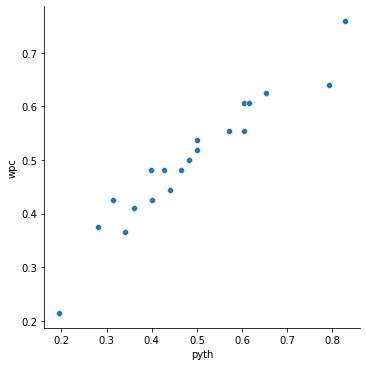

In [90]:
sns.relplot(x="pyth", y="wpc", data =df)

In [91]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           2.76e-11
Time:                        01:12:26   Log-Likelihood:                 39.810
No. Observations:                  20   AIC:                            -75.62
Df Residuals:                      18   BIC:                            -73.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1579      0.025      6.283      0.000       0.105       0.211
pyth           0.7010      0.049     14.330      0.000       0.598       0.804
==============================================================================
Omnibus:                        5.119   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.206
Skew:                          -0.955   Prob(JB):                        0.201
Kurtosis:                       3.446   Cond. No.                         7.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""